Download the dataset from https://www.kaggle.com/tongpython/cat-and-dog

## 1. Import library

In [1]:
import keras
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image

## 2. Model create

In [2]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

## 3. Model compile

In [3]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

## 4. Image augmentation

In [7]:
##create an object of ImageDataGenerator, for augmenting train set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=15, 
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range = 0.1,
                                   vertical_flip=False,
                                   horizontal_flip = True,
                                   fill_mode="reflect")

##create another object of ImageDataGenerator, for augmenting test set
test_datagen = ImageDataGenerator(rescale = 1./255)

##apply image augmentation on train set by resizing all images to 224x224 and creating batches of 32 images.
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (244,224),
                                                 batch_size = 8)

##apply image augmentation on test set by resizing all images to 224x224 and creating batches of 32 images.
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (224,244),
                                            batch_size = 8)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


## 5. Model fit

In [9]:
###steps_per_epoch: num of data divided by batch size
###validation_steps: num of data divided by batch size
history = model.fit_generator(generator=training_set,
                         steps_per_epoch = (8005/8),
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = (2023/8))

Epoch 1/5
251/250 [==============================] - 772s 3s/step - loss: 0.6972 - accuracy: 0.4975 - val_loss: 0.6936 - val_accuracy: 0.4824
Epoch 2/5
251/250 [==============================] - 757s 3s/step - loss: 0.6933 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.5020
Epoch 3/5
251/250 [==============================] - 743s 3s/step - loss: 0.6936 - accuracy: 0.4973 - val_loss: 0.6935 - val_accuracy: 0.4805
Epoch 4/5
251/250 [==============================] - 735s 3s/step - loss: 0.6934 - accuracy: 0.4878 - val_loss: 0.6930 - val_accuracy: 0.5117
Epoch 5/5
251/250 [==============================] - 738s 3s/step - loss: 0.6933 - accuracy: 0.4851 - val_loss: 0.6931 - val_accuracy: 0.5039


## Model Evaluation

In [10]:
# evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print('> %.3f' % (acc * 100.0))

Instructions for updating:
Please use Model.evaluate, which supports generators.
> 49.975


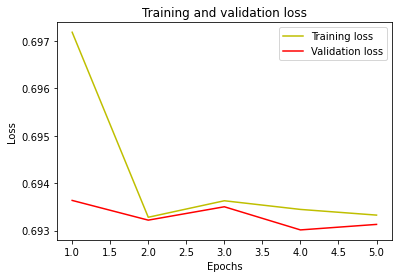

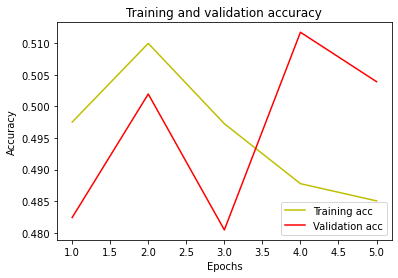

In [11]:
history = history

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 6. Model Saving and Prediction

In [12]:
test_image = image.load_img('image.jpg', 
                            target_size = (224, 224))

In [13]:
#add channel dimension for image
test_image = image.img_to_array(test_image)

In [14]:
##add batch dimension for image
test_image = np.expand_dims(test_image, axis = 0)

In [16]:
result = model.predict(test_image)

In [17]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [18]:
if result[0][0] == 1:
    print('Dog')
else:
    print('Cat')

Cat


In [19]:
model.save("vgg16_1.h5")

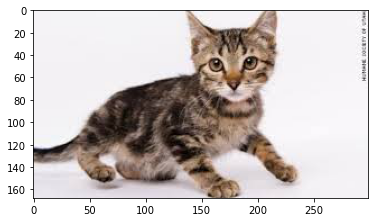

cat


In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
    #load the image
    img = load_img(filename, grayscale=False, target_size=(224, 224))
    #convert to array
    img = img_to_array(img)
    #reshape into a single sample with 1 channel
    img = img.reshape(1, 224, 224, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

img1 = mpimg.imread('image.jpg')
imgplot = plt.imshow(img1)
plt.show()
img = load_image("image.jpg")
model = load_model('vgg16_1.h5')
# predict the class
result = model.predict_classes(img)
if result[0] == 1:
    print("dog")
elif result[0] == 0:
    print("cat")
else:
    print("Not in the list")